In [24]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [25]:
## Preprocessing relevant information

In [26]:
def preprocessing(df):
    # Preprocessing formatted date to extarct important features  
    df['Hour'] = df['Formatted Date'].apply(pd.to_datetime, utc=True).dt.hour
    df['Year'] = df['Formatted Date'].apply(pd.to_datetime, utc=True).dt.year
    df['month'] = df['Formatted Date'].apply(pd.to_datetime, utc=True).dt.month
    df['date'] = df['Formatted Date'].apply(pd.to_datetime, utc=True).dt.day

    df = df.drop(labels=['Formatted Date'],axis=1)
    # df = df.drop(labels=['Formatted Date'],axis=1)
    df = df.drop(labels=['Daily Summary'],axis=1)
    # print(df.shape)
    df = df.drop(labels=['Summary'],axis=1)
    # print(df.shape)
    df = df.drop(labels=['Precip Type'],axis=1) 
    # print(df.shape)
    return df

In [27]:
## cost function for linear regression

In [28]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)

In [29]:
##  gradient descent algorithm

In [30]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

In [31]:
optimal_params = None

In [32]:
## Training the model

def train(url):
    df = pd.read_csv(url)
    df = preprocessing(df)

    y_train = df['Apparent Temperature (C)'].to_numpy().reshape(-1,1)
    X_train = df.drop(labels=['Apparent Temperature (C)'],axis=1).to_numpy()

    n_samples = len(y_train)
    X_train = np.hstack((np.ones((n_samples,1)),X_train))

    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)

    n_features = np.size(X_train,1)
    params = np.zeros((n_features,1))

    n_iters = 3300
    learning_rate = 0.002
    
    initial_cost = compute_cost(X_train, y_train, params)

    print("Initial cost is: ", initial_cost, "\n")
    (J_history, optimal_params) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)
    return (J_history, optimal_params)

In [33]:
J_history, optimal_params = train('/home/abhishek/dev/Semester_2/SMAI/Assignments/Assignment_2/Datasets/Question-4/weather.csv')

Initial cost is:  116.34132369788108 



In [34]:
print("Optimal parameters are: \n", optimal_params, "\n")
print("Final cost is: ", J_history[-1])

Optimal parameters are: 
 [[ 0.        ]
 [10.3003014 ]
 [-4.96629711]
 [-0.19783333]
 [ 0.93126192]
 [ 5.68614027]
 [ 1.87778057]
 [ 1.67526338]
 [ 0.74242112]
 [ 3.03857837]
 [ 0.60227733]] 

Final cost is:  [32.20947728]


In [35]:
## Analyzing Regression Coefficients - 

In [36]:
## Here the equestion of the line is (Y = WtX+b) where b is Wo which is the first parameter above given one

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(len(optimal_params)), optimal_params, 'r')
plt.title("Regression Coefficients")
plt.xlabel("Y-label")
plt.ylabel("W values")
plt.show()

## Higher value of W1 denotes this effects the most in deciding the Apparent temperature of day

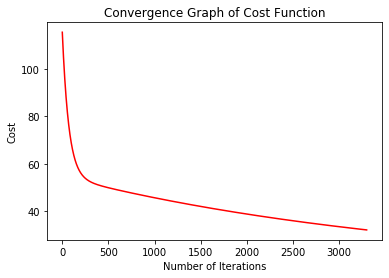

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(len(J_history)), J_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [40]:
def predict(url):
    df = pd.read_csv(url)
    y_test = df['Apparent Temperature (C)'].to_numpy()
    df = df.drop(labels=['Apparent Temperature (C)'],axis=1)
    X_test = preprocessing(df).to_numpy()
    X_test = np.hstack((np.ones((len(y_test),1)),X_test))
    scaler = MinMaxScaler()
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)
    predictions = []
    predictions =  X_test @ optimal_params
#     print(predictions.shape)
    return y_test,predictions

In [41]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_test,predictions = predict('/home/abhishek/dev/Semester_2/SMAI/Assignments/Assignment_2/Datasets/Question-4/test.csv')
print("R2-Score == ",r2_score(y_test,predictions))
y_test = y_test.reshape(-1,1).T
predictions = predictions.reshape(-1,1).T


R2-Score ==  0.7661806200275693


In [43]:
## Mean Square Error in linear Regression denotes the In statistics, the mean squared error or 
## mean squared deviation of an estimator measures the average of the squares of the errors—that is, 
## the average squared difference between the estimated values and the actual value.
print("Mean Squared Error",mean_squared_error(y_test,predictions))

Mean Squared Error 7.12359132691535


In [44]:
## In statistics, mean absolute error (MAE) is a measure of difference between two continuous variables
print("Mean Absolute Error",mean_absolute_error(y_test,predictions))


Mean Absolute Error 2.218473856282346


In [45]:
## The mean absolute percentage error,
## also known as mean absolute percentage deviation, is a measure of prediction accuracy of a forecasting method in statistics,
## for example in trend estimation, also used as a loss function for regression problems in machine learning.## 
print("Mean Absolute Percentage Error",mean_absolute_percentage_error(y_test,predictions))

Mean Absolute Percentage Error 26.658273910634577
